<a href="https://colab.research.google.com/github/rajathAgalkote/RFM_Segmentation_RetailAnalysis/blob/main/CaseStudy_RetailSaleAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Textile Chain Retail Analysis and Customer Segment Prediction



##### **Project Type**    - EDA & Classification

# **Project Summary -**

The objective of this project was to analyze a dataset containing customer transactions from a chain of retail stores, and to build classification models that predict customer purchase behavior. The dataset contained 1.1 million rows and 14 columns, with features such as customer ID, date of purchase, store ID, item ID, size, color, discount, price, and quantity.

The project started with data wrangling operations, including identifying and handling missing and invalid values, converting textual data to lowercase, and creating a new feature called "quantity" to count the number of duplicates in the dataset. Due to the large size of the dataset, only a part of it was processed.

Next, the RFM (Recency, Frequency, Monetary) segmentation technique was used to classify customers into different ranks based on their purchase behavior. Univariate and bivariate data visualization techniques were then used to understand the relationships between features. Insights were drawn from the analysis, including the fact that the majority of discounts were offered only on items of size 38, and that the majority of sales were generated from stores in the South zone.

Based on the analysis, strategical recommendations were made for stores in each zone, and the dataset was preprocessed for building classification models. Categorical encoding was performed on relevant categorical variables, and three different classification models were built, including Logistic regression model, Random forest model, and XGB Classifier model.

After evaluating the performance of the models using accuracy and cross-validation techniques, the XGB Classifier model was chosen as the final prediction model, with 75% accuracy on the train set and 72% accuracy on the test set. The final model was then used to predict customer purchase behavior, and strategical recommendations were made based on the predictions.

Overall, the project involved data wrangling, data visualization, and machine learning techniques to analyze customer transactions and predict customer purchase behavior. The insights gained from the analysis were used to make strategical recommendations for improving sales and customer retention in the retail stores.

# **Problem Statement**


A huge dataset of 1.1 million rows and 10 columns from a textile retail store was provided. The data contains information about customer transactions and various attributes related to each transaction. The company wants to analyze this data to gain insights into customer behavior and preferences in order to improve the store's marketing and sales strategies.

The objective of this project is to perform Textile Chain Retail Analysis and Customer Segmentation by exploring the dataset and answering the following questions:

* What is the sales trend of the store over time?
* Who are the most valuable customers for the store?
* How can we segment customers based on their buying behavior and preferences?
* What are the most popular products and categories sold by the store?
* What is the impact of discounts and promotions on customer purchases?
* How can the store improve its marketing and sales strategies based on these insights?

The project will involve data cleaning, data exploration, feature engineering, and data visualization techniques to gain insights into customer behavior and preferences. The ultimate goal is to provide actionable insights to the store that will help them improve their sales and marketing strategies and enhance customer satisfaction.

# ***Project Implementation***

## ***1. Libraries and Dataset***

### Import Libraries

In [ ]:
# Import Libraries

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing os and glob module
import os
import glob

# Importing drive to load datafiles
from google.colab import drive

# import ast(abstract syntax tree)
import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection modules
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# ML libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy import stats
from sklearn.linear_model import LogisticRegression


# Pickle library
import pickle

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Setting visualization style

sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams["figure.autolayout"] = True

### Dataset Loading

In [ ]:
# Load Dataset
# Mounting the Google Drive to access data.

drive.mount('/content/drive')

Mounted at /content/drive


The dataset in this case isn't collective, its been stored in form of numerous csv files sub-categorized in 9 different domains. Hence, for loading the data we'll visit all the files individually and copy all articles to a dataframe along with their category.

In [ ]:
# merging the files
joined_files = os.path.join("/content/drive/MyDrive/CapillaryTechnologies", "data_20*.csv")

In [ ]:
# A list of all joined files is returned
joined_list = glob.glob(joined_files)

joined_list

['/content/drive/MyDrive/CapillaryTechnologies/data_2023.csv',
 '/content/drive/MyDrive/CapillaryTechnologies/data_2020.csv',
 '/content/drive/MyDrive/CapillaryTechnologies/data_2016.csv',
 '/content/drive/MyDrive/CapillaryTechnologies/data_2015.csv',
 '/content/drive/MyDrive/CapillaryTechnologies/data_2019.csv',
 '/content/drive/MyDrive/CapillaryTechnologies/data_2018.csv',
 '/content/drive/MyDrive/CapillaryTechnologies/data_2021.csv',
 '/content/drive/MyDrive/CapillaryTechnologies/data_2017.csv',
 '/content/drive/MyDrive/CapillaryTechnologies/data_2022.csv']

In [ ]:
# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

We have successfully concatenated all the datafiles into a single dataset. We will now do all operations on our 'df' dataframe. 

But before starting with data wrangling, let us explore our dataset and gain a good understanding of what we are dealing with.

In [ ]:
df = df[df['year'] == 2023].head(30000)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year
0,338305054,798647011,1123.5171,0.0,2023-01-12,MTR ITMTR00047 Brooklyn FF Olive 30,Mens Trouser - Sportswear,Olive,30,South,South_7154,2023
1,365365630,797157768,1399.0000,0.0,2023-01-07,MBL ITMBL00004 Regular Casual Black 32,Mens Belt - Jeanswear,Black,32,East,East_7096,2023
2,407108598,814538060,559.6000,0.0,2023-03-08,MBL ITMBL00004 Regular Casual Black 32,Mens Belt - Jeanswear,Black,32,South,South_6018,2023
3,543246927,822669507,559.6000,0.0,2023-04-04,MBL ITMBL00004 Regular Casual Black 32,Mens Belt - Jeanswear,Black,32,South,South_6034,2023
4,540422034,810351290,599.6000,0.0,2023-02-23,MSO ITMSO00037 Slim FF Beige 30,MENS SHORTS,Beige,30,South,South_6028,2023


### Dataset Rows & Columns count

We will check the number of rows and columns using shape function.

In [ ]:
# Dataset Rows & Columns count
df.shape

(30000, 12)

We have a total of 1.1 Million rows and 12 features.

### Dataset Information

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the info() method.

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             30000 non-null  int64  
 1   bill_id             30000 non-null  int64  
 2   line_item_amount    30000 non-null  float64
 3   bill_discount       30000 non-null  float64
 4   transaction_date    30000 non-null  object 
 5   description         30000 non-null  object 
 6   inventory_category  28847 non-null  object 
 7   colour              23597 non-null  object 
 8   size                23597 non-null  object 
 9   zone_name           30000 non-null  object 
 10  store_name          30000 non-null  object 
 11  year                30000 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 3.0+ MB


We need to convert year and transaction_date feature to 'datetime' format. We will do it during data wrangling.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year
17,408095855,798996948,1083.8290,0.0,2023-01-13,MTR ITMTR00284 Brooklyn FF Black 38,MTR ITMTR00284 Brooklyn FF Black 38,Black,38,South,South_7184,2023
23,456232030,818602845,1267.2536,0.0,2023-03-21,MTR ITMTR00284 Brooklyn FF Black 38,MTR ITMTR00284 Brooklyn FF Black 38,Black,38,South,South_6034,2023
28,451126097,809000596,1265.4523,0.0,2023-02-18,MTR ITMTR00284 Brooklyn FF Black 38,MTR ITMTR00284 Brooklyn FF Black 38,Black,38,South,South_6034,2023
40,486631229,800169427,1273.7320,0.0,2023-01-17,MTR ITMTR00284 Brooklyn FF Black 38,MTR ITMTR00284 Brooklyn FF Black 38,Black,38,South,South_7348,2023
41,486631229,800169427,1273.7320,0.0,2023-01-17,MTR ITMTR00284 Brooklyn FF Black 38,MTR ITMTR00284 Brooklyn FF Black 38,Black,38,South,South_7348,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
29973,536181587,798475183,1424.9547,0.0,2023-01-12,MSH ITMSH04714 Slim LS Ecru M,MSH ITMSH04714 Slim LS Ecru M,NOT-CAPTURED,NOT-CAPTURED,North,North_7289,2023
29979,499993097,795461049,1591.6637,0.0,2023-01-01,MSH ITMSH04714 Slim LS Ecru M,MSH ITMSH04714 Slim LS Ecru M,NOT-CAPTURED,NOT-CAPTURED,South,South_7120,2023
29986,491597751,795499171,1487.9771,0.0,2023-01-01,MSH ITMSH04714 Slim LS Ecru M,MSH ITMSH04714 Slim LS Ecru M,NOT-CAPTURED,NOT-CAPTURED,South,South_7267,2023
29988,536527658,800019661,1507.1952,0.0,2023-01-17,MSH ITMSH04714 Slim LS Ecru M,MSH ITMSH04714 Slim LS Ecru M,NOT-CAPTURED,NOT-CAPTURED,East,East_7007,2023


In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

6433

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

user_id                  0
bill_id                  0
line_item_amount         0
bill_discount            0
transaction_date         0
description              0
inventory_category    1153
colour                6403
size                  6403
zone_name                0
store_name               0
year                     0
dtype: int64


We have several missing/NULL values in inventory_category, colour and size features; and only a couple of Null values in description feature. These missing values will not have a major impact on our analysis and predictions. Hence, we will replace these with arbitrary values during wrangling operations.

**KINDLY NOTE** : There are other invalid entries in our dataset, which will be handled during wrangling/cleaning operations.

## ***2. Understanding the Variables***

In [ ]:
# Dataset Columns
print(len(df.columns))
df.columns

12


Index(['user_id', 'bill_id', 'line_item_amount', 'bill_discount',
       'transaction_date', 'description', 'inventory_category', 'colour',
       'size', 'zone_name', 'store_name', 'year'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,30000.0,4.622343e+08,1.134966e+08,55509.0,4.244975e+08,5.120955e+08,5.371888e+08,5.434322e+08
bill_id,30000.0,8.079496e+08,8.336690e+06,795241546.0,8.001585e+08,8.071272e+08,8.152329e+08,8.235304e+08
line_item_amount,30000.0,1.096597e+03,9.070830e+02,0.0,2.990000e+02,9.829956e+02,1.567339e+03,1.599600e+04
bill_discount,30000.0,7.294202e+01,5.383242e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.676972e+04
year,30000.0,2.023000e+03,0.000000e+00,2023.0,2.023000e+03,2.023000e+03,2.023000e+03,2.023000e+03


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

user_id               19421
bill_id               21239
line_item_amount       6947
bill_discount           471
transaction_date         96
description            1621
inventory_category     1283
colour                  100
size                     27
zone_name                 6
store_name              245
year                      1
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Changing dtypes 

Let us begin wrangling by first converting year and transaction date into datetime64 format. We will also extract month and day as individual features and then drop transaction_date feature.

In [ ]:
#Changing datatype : date => object -> datetime64
df = df.astype({
    'year':'datetime64[ns]',
    'transaction_date':'datetime64[ns]'
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             30000 non-null  int64         
 1   bill_id             30000 non-null  int64         
 2   line_item_amount    30000 non-null  float64       
 3   bill_discount       30000 non-null  float64       
 4   transaction_date    30000 non-null  datetime64[ns]
 5   description         30000 non-null  object        
 6   inventory_category  28847 non-null  object        
 7   colour              23597 non-null  object        
 8   size                23597 non-null  object        
 9   zone_name           30000 non-null  object        
 10  store_name          30000 non-null  object        
 11  year                30000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 3.0+ MB


#### Creating quantity feature and removing duplicates

In [ ]:
# Create a new 'quantity' column with default value of 1
df['quantity'] = 1

# Group the dataframe by all columns except the 'quantity' column
# and count the number of occurrences of each group
counts = df.groupby(df.columns.tolist()[:-1]).size().reset_index(name='counts')

# Iterate over each row of the counts dataframe and update the 'quantity'
# column in the original dataframe for each matching group
for i, row in counts.iterrows():
    mask = (df.iloc[:, :-1] == row[:-1]).all(axis=1)
    df.loc[mask, 'quantity'] = row['counts']

# Drop the duplicate entries, keeping the first occurrence
df.drop_duplicates(inplace=True, keep='first')

The above code had to iterate through 1.1 million rows and took an extensively long computing time, i.e., around 15 hours.

Hence, we had to restart the project taking only 30000 rows from data_2023 csv.

We have now created a new feature that counts the number of duplicate entries as the "quantity" of items purchased. Also, the duplicate entries have now been dropped, which was a vital operation of our data wrangling code.

Now, we will continue our data wrangling by first checking our df dataframe and verifying that there are no more duplicates in our dataset.

In [ ]:
df.columns

Index(['user_id', 'bill_id', 'line_item_amount', 'bill_discount',
       'transaction_date', 'description', 'inventory_category', 'colour',
       'size', 'zone_name', 'store_name', 'year', 'quantity'],
      dtype='object')

In [ ]:
# Checking unique values in quantity feature
df['quantity'].unique()

array([ 1,  2,  4,  3,  7,  6,  5,  8, 22, 33, 11, 16, 30, 10])

There is now a new feature called quantity in our dataset.

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Handling Missing values

Next, we will handle the missing values. We have missing values in inventory_category, colour and size.

We have several entries in **colour** and **size** features that display "NOT-CAPTURED". We will replace it by NAN and consider it as NULL/Missing values

In [ ]:
# Replacing 'NOT-CAPTURED' by NaN
df = df.replace('NOT-CAPTURED', np.nan)

We also have a few alphanumerical values in size feature, such as 2XL, XL, etc. We will substitute these values as follows:

* EES - 32
* XS and ES - 34
* S	- 36	
* M	- 38	
* L	- 40	
* EL and XL - 42	
* 2XL	and EEL - 44	
* 3XL	- 46
* 5XL - 50
* Foot and 23CM - NaN

In [ ]:
df['size'].unique()

array(['30', '32', 'L', '2XL', '40', '38', '36', '42', '34', 'XL', 'M',
       'S', 'Foot', 'EEL', '44', 'EES', '46', '3XL', 'EL', 'ES', 'XS',
       '28', '5XL', '23CM', nan, '4XL', '6XL'], dtype=object)

In [ ]:
# creating a dictionary to map the old values to the new values
size_mapping = {'EES': 32, 'XS':34, 'ES': 34, 'S': 36, 'M': 38, 'L': 40, 'EL':42, 'XL': 42, '2XL': 44, 'EEL': 44, '3XL': 46, '4XL': 48, '5XL': 50, '6XL' : 52, 'Foot':None,'nan':np.nan, '23CM':np.nan}

# replace the values using the mapping dictionary
df['size'] = df['size'].replace(size_mapping)

In [ ]:
# Checking again for Missing Values/Null Values Count
print(df.isnull().sum())

user_id                   0
bill_id                   0
line_item_amount          0
bill_discount             0
transaction_date          0
description               0
inventory_category      848
colour                22318
size                  22326
zone_name                 0
store_name                0
year                      0
quantity                  0
dtype: int64


In [ ]:
# Replacing None(object dtype) with NaN(float dtype) 
df['size'].replace({None: np.nan}, inplace=True)

In [ ]:
# Checking unique values in size feature to verify that it's cleaned
df['size'].unique()

array(['30', '32', 40, 44, '40', '38', '36', '42', '34', 42, 38, 36, nan,
       '44', 32, '46', 46, 34, '28', 50, 48, 52], dtype=object)

We will first handle the size category. We will check for the distribution of the feature and then handle it accordingly.

if the missing values are randomly distributed and the feature has a normal distribution, then imputing the missing values with the mean might be reasonable. On the other hand, if the feature has a skewed distribution or contains outliers, it might be better to use the median for imputation, since it is less sensitive to outliers than the mean.

In [ ]:
# Changing datatype : size => object -> int64
df = df.astype({
    'size':'float64'
})

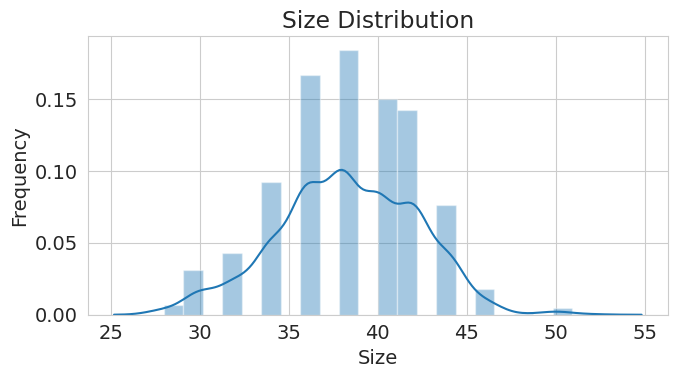

In [ ]:
# Plotting a distplot to observe the distribution of size feature
sns.distplot(df['size'])
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Size Distribution')
plt.show()

The distribution is normal, and hence, we will replace NaN values by the mean of the feature, which is size '38'.

In [ ]:
df['size'].mean()

38.288477034649475

In [ ]:
df['size'].replace({np.nan:38}, inplace=True)

Now, we will handle colour feature. It has several unique entries, but 22318 out of 23567 entries are missing. Moreover, it is not a vital feature in our dataset. Hence, we will drop this entire feature to make sure that it doesn't interfere with our analysis and predictions.

In [ ]:
# Dropping 'colour' feature
df.drop('colour', axis=1, inplace=True)

Now, let us handle the inventory_category feature. This feature has several unique entries in it. Although, this is not a vital feature in our analysis, we will not drop it until our EDA is complete. We will drop it before our predictions, since this feature will definitely interfere with predictions. For now, we will replace NULL values with 'Unknown' value.

In [ ]:
# FillNa -> 'unknown'
df['inventory_category'].fillna('unknown', inplace=True)

In [ ]:
df.isnull().sum()

user_id               0
bill_id               0
line_item_amount      0
bill_discount         0
transaction_date      0
description           0
inventory_category    0
size                  0
zone_name             0
store_name            0
year                  0
quantity              0
dtype: int64

**Now, there are no more missing values in our dataset.**

#### Dropping invalid rows

In our dataset, we have some rows where line_item_amount has a value of 0.00

But technically, this is not possible as any transaction value cannot be equal to zero. Hence, we will drop these rows and complete the cleaning process.

In [ ]:
df[df['line_item_amount']==0]

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,size,zone_name,store_name,year,quantity
16661,463947150,805933363,0.0,1998.0,2023-02-07,mss itmss00160 regular ls grey mel m,mss itmss00160 regular ls grey mel m,38.0,east,east_7404,1970-01-01 00:00:00.000002023,1
16690,518747634,806176936,0.0,2299.0,2023-02-08,msh itmsh04498 slim ss sap m,msh itmsh04498 slim ss sap m,38.0,south,south_7256,1970-01-01 00:00:00.000002023,1
17656,4284888,799616419,0.0,999.0,2023-01-15,mwl itmwl00036 solids solids tan 23cm,mwl itmwl00036 solids solids tan 23cm,38.0,south,south_7458,1970-01-01 00:00:00.000002023,1
18248,405345543,799351821,0.0,2699.0,2023-01-14,msh itmsh04505 slim ss red s,msh itmsh04505 slim ss red s,38.0,south,south_7489,1970-01-01 00:00:00.000002023,6
20022,516805017,817672909,0.0,2499.0,2023-03-19,mtr itmtr01168 brooklyn ff black 36,mtr itmtr01168 brooklyn ff black 36,38.0,west,west_7238,1970-01-01 00:00:00.000002023,1
26942,338734213,801551524,0.0,1499.0,2023-01-22,mts itmts01221 stretch ss pep green l,mts itmts01221 regular ss pep green l,38.0,south,south_7256,1970-01-01 00:00:00.000002023,2


In [ ]:
# Keeping rows only if valid
df = df[df['line_item_amount'] != 0]

In [ ]:
# Verifying
len(df[df['line_item_amount']==0])

0

#### Object dtypes to lowercase.

Converting all object features to lowercase.

In [ ]:
# Converting all object datatypes to lowercase
df[['description', 'inventory_category', 'zone_name', 'store_name']] = df[['description', 'inventory_category', 'zone_name', 'store_name']].apply(lambda x: x.str.lower())

#### Dropping zone_name to avoid multi-collinearity

The features zone_name and store_name will possibly induce multi-collinearity during our predictive modelling. This is because store_name gives us the same information that zone_name gives and more.

Hence, we will be dropping the store_name feature after EDA since, zone_name will ease our visualizations when compared to store_name, whereas store_name provides more information when compared to zone_name.

Now that our cleaning is complete, we can start with our Customer Segmentation.

### RFM Segmentation

Customer segmentation is the process of dividing customers into groups or segments based on shared characteristics or behavior. It is an important strategy for businesses because it helps them to better understand their customers and tailor their marketing efforts to specific groups, which can improve customer satisfaction and increase revenue.

Here are some primary reasons why customer segmentation is important:

* Personalization: By dividing customers into smaller groups based on their preferences, behaviors, and demographics, businesses can tailor their products, services, and marketing messages to better match the needs and preferences of each segment.

* Improved customer experience: By targeting specific segments with personalized messages and promotions, businesses can create a more engaging and satisfying customer experience. This can lead to increased loyalty and positive word-of-mouth marketing.

* More effective marketing: Customer segmentation allows businesses to identify which segments are most profitable, which channels they prefer, and what types of messages resonate with them. This information can be used to create more effective marketing campaigns that generate higher response rates and conversions.

* Cost savings: By targeting specific customer segments with personalized messages and promotions, businesses can avoid wasting resources on ineffective marketing efforts that don't resonate with their target audience.

Overall, customer segmentation is a powerful tool for businesses looking to improve their marketing effectiveness, increase customer satisfaction, and drive revenue growth.

#### Recency (R)

Now, we will consider the transaction date feature and extract day and month as two separate features, and eventually drop the 'transaction_date' feature.

In [ ]:
df['transaction_date'].describe(include=all, datetime_is_numeric = True)

count                            23561
mean     2023-02-15 00:24:37.832010496
min                2023-01-01 00:00:00
25%                2023-01-20 00:00:00
50%                2023-02-14 00:00:00
75%                2023-03-12 00:00:00
max                2023-04-06 00:00:00
Name: transaction_date, dtype: object

In [ ]:
df.columns

Index(['user_id', 'bill_id', 'line_item_amount', 'bill_discount',
       'transaction_date', 'description', 'inventory_category', 'size',
       'zone_name', 'store_name', 'year', 'quantity'],
      dtype='object')

In [ ]:
# Creating a new dataframe that includes only the last transaction dates of each user
df_recency = df.groupby('user_id')['transaction_date'].max().reset_index()
df_recency.rename(columns={'transaction_date': 'latest_purchase_date'}, inplace=True)

In [ ]:
df_recency['latest_purchase_date'].describe(include=all, datetime_is_numeric = True)

count                            19419
mean     2023-02-15 19:09:32.284875776
min                2023-01-01 00:00:00
25%                2023-01-21 00:00:00
50%                2023-02-16 00:00:00
75%                2023-03-12 00:00:00
max                2023-04-06 00:00:00
Name: latest_purchase_date, dtype: object

In [ ]:
# Calculating the recency value
recent_date = df_recency['latest_purchase_date'].max()
df_recency['Recency'] = df_recency['latest_purchase_date'].apply(lambda x: (recent_date - x).days)
df_recency.head()

,user_id,latest_purchase_date,Recency
0,55509,2023-01-13,83
1,57291,2023-04-03,3
2,58758,2023-04-02,4
3,63021,2023-01-13,83
4,66323,2023-03-16,21


#### Frequency (F)

In [ ]:
# Creating new dataframe to calculate frequency of customers
frequency_df = df.groupby(by=['user_id'], as_index=False)['transaction_date'].count()
frequency_df.columns = ['user_id', 'Frequency']

In [ ]:
# Frequency values
frequency_df['Frequency'].unique()

array([ 1,  2,  3,  4,  6,  5,  8,  9,  7, 10, 11, 41, 18, 15])

In [ ]:
frequency_df.head()

,user_id,Frequency
0,55509,1
1,57291,1
2,58758,1
3,63021,1
4,66323,1


#### Monetary (M)

For this process of determining **Monetary Value**, we will first group by 'df' dataframe using 'user_id' and 'transaction_date' features. This will inform us about the total daily transactions of every user. But, we cannot segment users into different category based on total-daily transactions only. There might be some customers that do not buy in large quantities, but might have an overall higher buying average.

Hence, we will take an average of the daily-transactions per user to estimate their buying behaviour.

In [ ]:
df['Total'] = df['Sales']*df['Quantity']
monetary_df = df.groupby(by='Customer Name', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()

In [ ]:
# Group by 'user_id' and 'transaction_date', take sum of the product of 'quantity' and 'line_item_amount'
df_sum = df.groupby(['user_id', 'transaction_date'])[['quantity', 'line_item_amount']].apply(lambda x: (x['quantity']*x['line_item_amount']).sum()).reset_index()
df_sum.columns = ['user_id', 'transaction_date', 'total_amount']

In [ ]:
df_sum.head()

,user_id,transaction_date,total_amount
0,55509,2023-01-13,3999.2000
1,57291,2023-04-03,299.0000
2,58758,2023-04-02,299.0000
3,63021,2023-01-13,1411.0934
4,66323,2023-03-16,22392.0000


In [ ]:
# Group by 'user_id', take average of the 'total_amount' for each user
monetary_df = df_sum.groupby('user_id')['total_amount'].mean().reset_index()

# Rename the columns to 'user_id' and 'avg_daily_transaction'
monetary_df = monetary_df.rename(columns={'user_id': 'user_id', 'total_amount': 'Monetary'})

In [ ]:
# firstlook of the dataframe
monetary_df.head()

,user_id,Monetary
0,55509,3999.2000
1,57291,299.0000
2,58758,299.0000
3,63021,1411.0934
4,66323,22392.0000


Now that we have obtained our required monetary value, we have to segment the customers using this information. In order to do this, we first need to understand the distribution of this feature.


In [ ]:
monetary_df['Monetary'].describe()

count     19419.000000
mean       1486.762363
std        2254.188615
min           9.000000
25%         299.000000
50%        1160.131100
75%        2182.066200
max      216747.146000
Name: Monetary, dtype: float64

From the description of the avg_daily_transaction feature above, we can make two main observations:
* There are some outliers present in this feature.
* We can segment customers using RFM scores.

#### Merging RFM 

Here we are merging all the dataframe columns in a single entity using the merge function to display the recency, frequency, monetary value.

In [ ]:
# merging dataframes on 'user_id' one after the other
recency_frequency_df = df_recency.merge(frequency_df, on='user_id')
rfm_df = recency_frequency_df.merge(monetary_df, on='user_id').drop(columns='latest_purchase_date')

In [ ]:
# First-view
rfm_df.head()

,user_id,Recency,Frequency,Monetary
0,55509,83,1,3999.2000
1,57291,3,1,299.0000
2,58758,4,1,299.0000
3,63021,83,1,1411.0934
4,66323,21,1,22392.0000


#### Normalizing RFM values

Before we can rank the customers, we need to normalize the values of R, F and M.
Hence, below we are normalizing the rank of the customers within a company to analyze the ranking.

In [ ]:
# Creating ranks by sorting
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)    # Most recent has less number of days -> descending order
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
# by dividing from the highest value in the ranks
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['M_rank']/rfm_df['M_rank'].max())*100

In [ ]:
rfm_df.head()

,user_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,R_rank,F_rank,M_rank
0,55509,83,1,3999.2000,15.555154,41.863639,95.494104,3010.0,8129.5,18544.0
1,57291,3,1,299.0000,97.581458,41.863639,20.410423,18882.5,8129.5,3963.5
2,58758,4,1,299.0000,96.343764,41.863639,20.410423,18643.0,8129.5,3963.5
3,63021,83,1,1411.0934,15.555154,41.863639,59.421185,3010.0,8129.5,11539.0
4,66323,21,1,22392.0000,78.103925,41.863639,99.953654,15113.5,8129.5,19410.0


In [ ]:
# Dropping non-normalized RFM features
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()

,user_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,55509,83,1,3999.2000,15.555154,41.863639,95.494104
1,57291,3,1,299.0000,97.581458,41.863639,20.410423
2,58758,4,1,299.0000,96.343764,41.863639,20.410423
3,63021,83,1,1411.0934,15.555154,41.863639,59.421185
4,66323,21,1,22392.0000,78.103925,41.863639,99.953654


Now, we have obtained the normalized RFM values. We will now score the customers/users based on their rankings.

#### RFM Scores

RFM score is calculated based upon recency, frequency, monetary value normalized ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. 

The standard formula used for calculating rfm score is : 

> (0.15 x Recency score) + (0.28 x Frequency score) + (0.57 x Monetary score)

In [ ]:
# Applying the formula
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 *rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']

In [ ]:
rfm_df.head()

,user_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,55509,83,1,3999.2000,15.555154,41.863639,95.494104,68.486731
1,57291,3,1,299.0000,97.581458,41.863639,20.410423,37.992978
2,58758,4,1,299.0000,96.343764,41.863639,20.410423,37.807324
3,63021,83,1,1411.0934,15.555154,41.863639,59.421185,47.925168
4,66323,21,1,22392.0000,78.103925,41.863639,99.953654,80.410990


RFM score is always calculated out of 5.

Hence, we will take 5% value of the RFM score. 

In [ ]:
# Calculating RFM out of 5 
rfm_df['RFM_Score'] *= 0.05

# Rounding to 2 decimal points
rfm_df = rfm_df.round(2)

In [ ]:
# First view of the required df
rfm_df[['user_id', 'RFM_Score']].head(7)

,user_id,RFM_Score
0,55509,3.42
1,57291,1.90
2,58758,1.89
3,63021,2.40
4,66323,4.02
5,66452,1.47
6,66989,1.72


Rating Customer based upon the RFM score:

* rfm score > 4.5 : Top Customer
* 4.5 > rfm score > 4 : High Value Customer
* 4 > rfm score > 3 : Medium value customer
* 3 > rfm score > 1.6 : Low-value customer
* rfm score < 1.6 : Lost Customer

In [ ]:
# Categorizing the customers
rfm_df["customer_category"] = np.where(rfm_df['RFM_Score']>4.5, "Top Customers",
                                      (np.where(rfm_df['RFM_Score'] > 4,"High value Customer",
                                        (np.where(rfm_df['RFM_Score'] > 3,"Medium Value Customer",
                                          np.where(rfm_df['RFM_Score'] > 1.6,'Low Value Customers','Lost Customers'))))))

In [ ]:
# First view
rfm_df[['user_id', 'RFM_Score', 'customer_category']].head()

,user_id,RFM_Score,customer_category
0,55509,3.42,Medium Value Customer
1,57291,1.90,Low Value Customers
2,58758,1.89,Low Value Customers
3,63021,2.40,Low Value Customers
4,66323,4.02,High value Customer


Now that we have segmented the customers, we will merge the df_avg dataframe with df dataframe on 'user_id'.

In [ ]:
# Merging on user_id
df = pd.merge(df, rfm_df[['user_id', 'customer_category']], on='user_id', how='left')

#### Saving cleaned dataframe to csv

In [ ]:
df.head(2)

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,size,zone_name,store_name,year,quantity,customer_category
0,338305054,798647011,1123.5171,0.0,2023-01-12,mtr itmtr00047 brooklyn ff olive 30,mens trouser - sportswear,30.0,south,south_7154,1970-01-01 00:00:00.000002023,1,Low Value Customers
1,365365630,797157768,1399.0000,0.0,2023-01-07,mbl itmbl00004 regular casual black 32,mens belt - jeanswear,32.0,east,east_7096,1970-01-01 00:00:00.000002023,1,Low Value Customers


We will also save the dataframe cleaned off duplicates as a csv file so that we do not have to run the above iterations every single time, but instead use the cleaned df directly from the csv file.

In [ ]:
# Saving df to csv
df.to_csv("cleaned_df.csv",index=False)

In [ ]:
# Downloading csv to local device
from google.colab import files
files.download("cleaned_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ***4. Data Vizualization : Understanding the relationships between variables***

Let us load our saved cleaned_df csv file.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CapillaryTechnologies/cleaned_df.csv")

In [ ]:
df.head(2)

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,size,zone_name,store_name,year,quantity,customer_category
0,338305054,798647011,1123.5171,0.0,2023-01-12,mtr itmtr00047 brooklyn ff olive 30,mens trouser - sportswear,30.0,south,south_7154,1970-01-01 00:00:00.000002023,1,Low Value Customers
1,365365630,797157768,1399.0000,0.0,2023-01-07,mbl itmbl00004 regular casual black 32,mens belt - jeanswear,32.0,east,east_7096,1970-01-01 00:00:00.000002023,1,Low Value Customers


#### Chart - 1
Analyzing discount

In [ ]:
# Creating a new dataframe
discount_df = df

In [ ]:
# Creating a new feature
discount_df['discount_status'] = np.where(discount_df['bill_discount'] > 0, 'discounted', 'not_discounted')

# Print counts of users by discount status
print(discount_df['discount_status'].value_counts())

not_discounted    22775
discounted          786
Name: discount_status, dtype: int64


In [ ]:
discounted_df = discount_df[discount_df['discount_status']=='discounted']

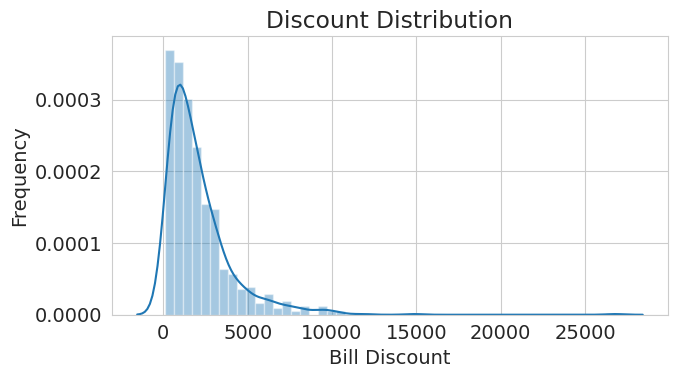

In [ ]:
# Plotting a distplot to observe the distribution of bill_discount feature
sns.distplot(discounted_df['bill_discount'])
plt.xlabel('Bill Discount')
plt.ylabel('Frequency')
plt.title('Discount Distribution')
plt.show()

As we can observe the distribution of bill_discount feature is normal (symmetric around the mean), which means that most of the discounts offered were around ₹2112/-

We will compare the discount offered with the possible_churn feature to explore any relationship among the two features.

In [ ]:
discounted_df['bill_discount'].describe()

count      786.000000
mean      2112.874602
std       2081.834251
min         99.900000
25%        800.000000
50%       1500.000000
75%       2723.362500
max      26769.720000
Name: bill_discount, dtype: float64

#### Chart - 2
Exploring discount with size

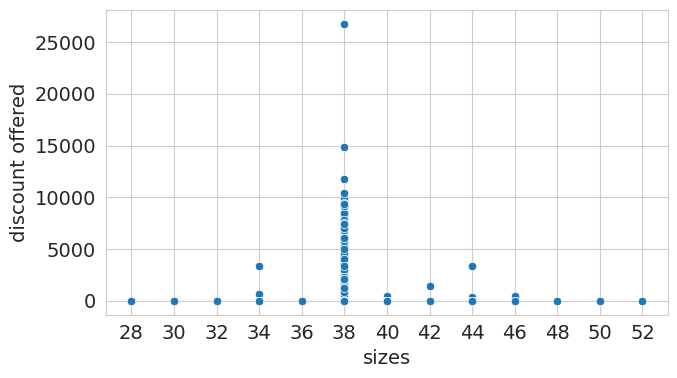

<Figure size 200x200 with 0 Axes>

In [ ]:
# Chart - 2 visualization code

# Scatterplot to understand the distribution of dataset w.r.t "discount" and "size"
sns.scatterplot(x="size",
                    y="bill_discount",
                    data=df)

plt.xlabel('sizes')
plt.ylabel('discount offered')
plt.xticks([28,30,32,34,36,38,40,42,44,46,48,50,52])
plt.figure(figsize=(2, 2))
plt.show()
     

We have used a simple seaborn scatterplot to observe the behaviour of "possible_churn" with discount range and sizes.

We can observe the following from the scatterplot:
* The discounts offered seem to be more focused on items of size 38, whereas other sizes are barely receiving discounts.

This methodology of focusing the discounts on a particular size category is not an ideal strategy, unless backed by a significant reasoning. 

In [ ]:
df['size'].value_counts()

38.0    22570
36.0      226
40.0      203
42.0      193
34.0      125
44.0      103
32.0       58
30.0       42
46.0       24
28.0        9
50.0        6
48.0        1
52.0        1
Name: size, dtype: int64

But as we can observe, majority of the items lie in the 38-size category and hence, such extensive discounts were observed for this particular size in order to clear the manufactured items as the supply was extremely high.

This scenario can be improved by offering discounts more evenly wrt sizes.

#### Chart - 3
Sizes and stores

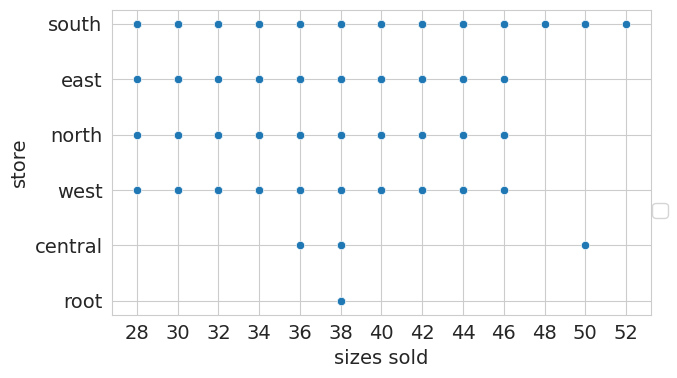

<Figure size 600x600 with 0 Axes>

In [ ]:
# Chart - 3 visualization code
# Scatterplot to understand the distribution of dataset w.r.t "discount" and "size"
sns.scatterplot(x="size",
                    y="zone_name",
                    data=df)

plt.xlabel('sizes sold')
plt.ylabel('store')
plt.xticks([28,30,32,34,36,38,40,42,44,46,48,50,52])
plt.legend(bbox_to_anchor=(1.05, 0.4), loc='upper right')
plt.figure(figsize=(6, 6))
plt.show()

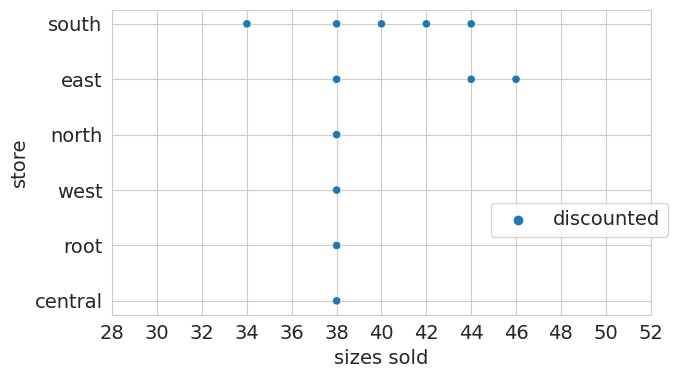

<Figure size 200x200 with 0 Axes>

In [ ]:
# Comparing with only discounted df
sns.scatterplot(x="size",
                    y="zone_name",
                    hue="discount_status",
                    data=discounted_df)

plt.xlabel('sizes sold')
plt.ylabel('store')
plt.xticks([28,30,32,34,36,38,40,42,44,46,48,50,52])
plt.legend(bbox_to_anchor=(1.05, 0.4), loc='upper right')
plt.figure(figsize=(2, 2))
plt.show()

We have plotted two sactterplots with two different dataframes. The first plot informs us of the overall sales in all zones (north, south, east, west and root).

Whereas the second plot uses discounted_df dataframe that includes transaction information only if any discount was offered.

From the above two plots, we can observe the following:

* ROOT store - ONline E-commerce store. It sells only items of size 38, but provides discounts.
* CENTRAL store - Sells items of size 36,38 and 50. But offers discount to size 38 only.
* WEST, NORTH AND EAST stores - Sells items in the range 28 to 46. But mainly offers discounts to items in size 38 category.
* SOUTH store - Sells items in all sizes, and offers discounts between sizes 34 to 44.


Overall, it looks like SOUTH zone stores are doing a good job at providing discounts in a wide range, when compared to other zones.

In [ ]:
df['zone_name'].value_counts()

south      16727
west        2703
north       2554
east        1109
root         373
central       95
Name: zone_name, dtype: int64

We can confirm the same using value_counts() function which clearly tells us that south zone has the best sales as compared to the other zones.

#### Chart - 4
Customer segmentation

Now, let us understand the number of customers that are segregated into their respective categories. Once we have observed our customer category distribution, we will try to understand more about the reasoning for these behaviours.

So firstly, let us observe the distribution of customer segments using a simple Pie Chart.

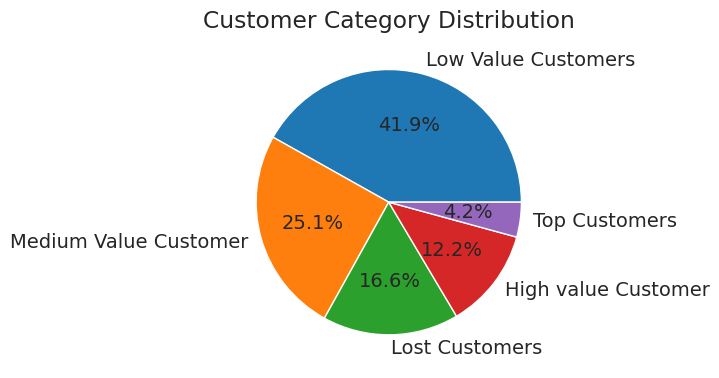

In [ ]:
# Customer category distribution

category_counts = df['customer_category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Customer Category Distribution')
plt.show()

From the above pie chart, we can observe that we have a majority of customers in the "Low value customers" category (about 41.9%). This is almost 2/5 of the entire customer base.At the same time, we can also observe a significant sector of customers in "Lost Customers" category as well. 

Providing good discounts and offers to these customers might encourage them to become repeat customers and transact more in the future.But we cannot assume that these customers are likely to churn, because this segment might also include new customers who have recently started to purchase items from our stores.

To summarize, we need to understand more about our customer behaviour before we make any assumptions.

#### Chart - 5
Average discount offered per category

Let us observe and compare the average values of discounts offered to all categories of customers.

But, we need to note that taking average of discount in our 'df' dataframe will consider those customers with no discount as well. But this is also an important metric to observe, since it provides us a wide perspective of the categories with the most discount offered in general.

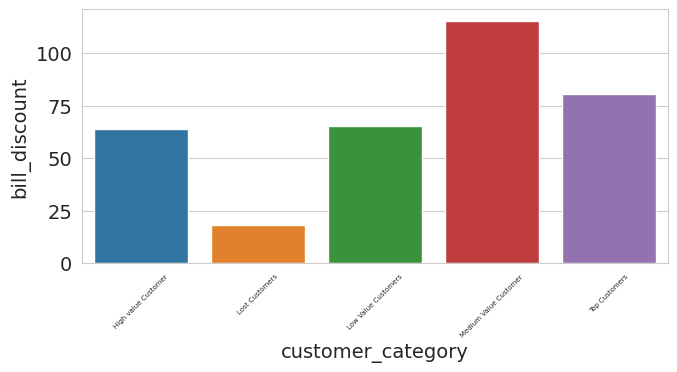

In [ ]:
# Groupby 'customer_category' and take average of 'bill_discount'
avg_discounts = df.groupby('customer_category')['bill_discount'].mean().reset_index()

# Plot the bar plot
sns.barplot(x='customer_category', y='bill_discount', data=avg_discounts)
plt.xticks(fontsize= 5, rotation = 45)
plt.show()

We can observe that the Medium category was offered the most discount, whereas the Lost customers category was offered negligible discount when this is the category that requires the most discounts to encourage more customer retention.


Hence, we will also observe the same with 'discounted_df' dataframe as well. This is to observe among the customers who received discounts, if any particular category of customers received more/less discounts as compared to the others.

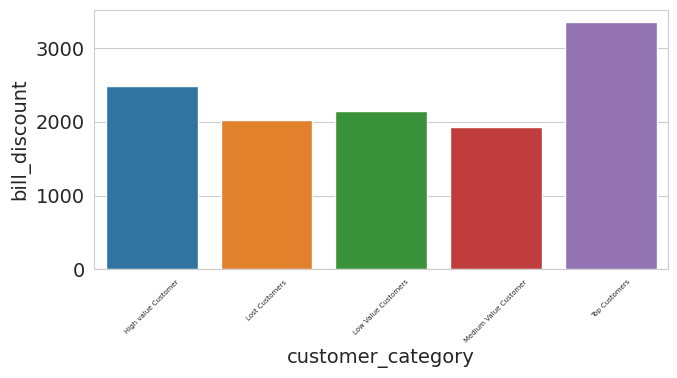

In [ ]:
# Groupby 'customer_category' and take average of 'bill_discount'
avg_discounts = discounted_df.groupby('customer_category')['bill_discount'].mean().reset_index()

# Plot the bar plot
sns.barplot(x='customer_category', y='bill_discount', data=avg_discounts)
plt.xticks(fontsize= 5, rotation = 45)
plt.show()

It is evident from the above bar plot comparison that all the customer categories have received similar discounts, except for top customers. This tells us that discounts were generally offered within a constant range to all customers, but mainly in the top-customers category.

#### Chart - 6
Zone-wise customer segement

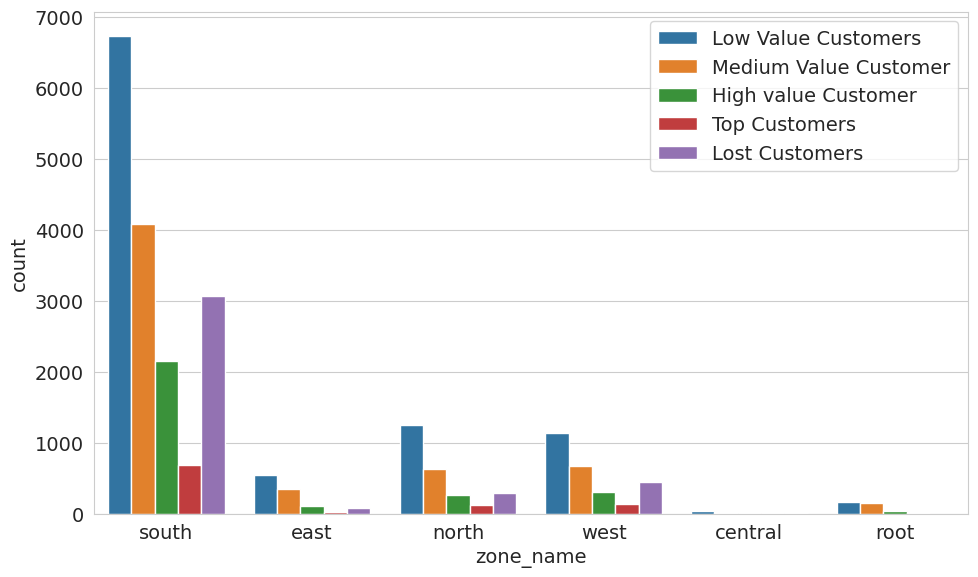

In [ ]:
# Countplot to observe zone-wise distribution of customer category
plt.figure(figsize=(10, 6))
sns.countplot(x='zone_name', hue='customer_category', data=df)
plt.legend(loc='upper right')
plt.show()

Let us try to analyse the distribution of customers taking one zone at a time.

> South Zone : Low > Medium > Lost > High > Top

Although South zone has the highest number of sales, these sales are mainly attained through Low, Medium and Lost customers. It is not an ideal scenario for any sales platform in the long run. If these customers are not encouraged to buy repeatedly from the stores, we can lose these customers permanently.

> East Zone : Low > Medium > High > Lost > Top (Negligible)

It seems like the east zone stores are slightly new since they do not have a significant number of sales. These stores should focus on overall marketing of their stores without focusing on customer segment to provide offers and discounts to all customers.

> North Zone & West Zone : Low > Medium > Lost > High > Top

These stores have a decent sales numbers, but they need to focus more on Low and Lost Customers. Customers in the low segment need to be offered with coupon codes to encourage them to be repeat customers, whereas the lost customers should be offered with promotional offers in order to re-acquire these customers.

> Central Zone

It is too early to analyse the central zone. But since this seems like a new set of chain stores, it is a good strategy to provide offers to all customers, but depending on items. Providing offers to selective items will encourage customers to buy particular items. Although it focuses on only particular items, it will promote the overall store sales and helps in creating repeat customers.

> ROOT : An online E-commerce store

Too early to analyse. Strategies similar to central zone have to be implemented.

#### Chart - 7 - Correlation Heatmap

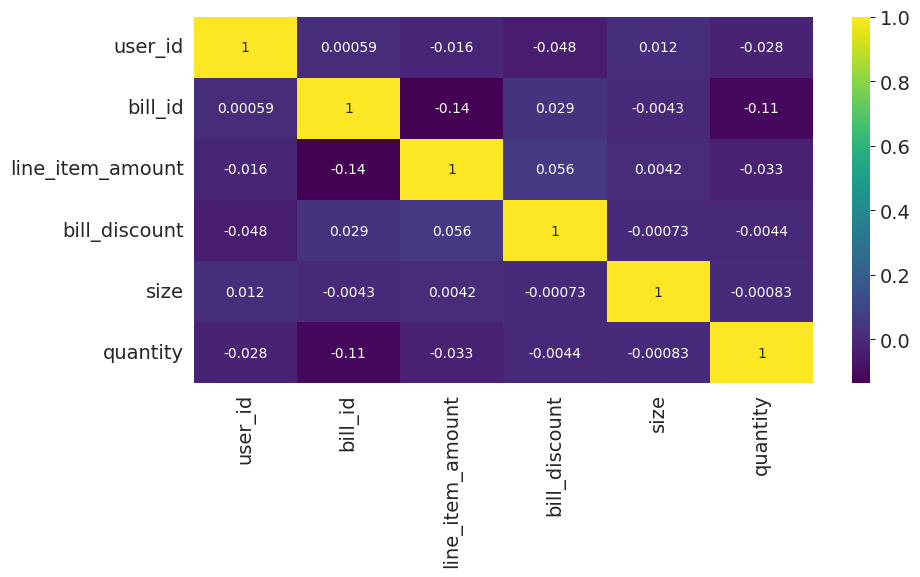

In [ ]:
# Correlation Heatmap visualization code

# Checking for multi-collinearity
correlation = df.corr()

plt.figure(figsize=[10, 6])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})
plt.show()

**KINLDY NOTE :** The intention of this heatmap is to only check for multi-collinearity, and not for the relationship between dependent and independent variables. This is because, our dependent variable is still a categorical column and we need to perform categorical encoding on the same.

Hence, the above heatmap shows no multi-collinearity among independent variables.

## ***5. Feature Engineering & Data Pre-processing***

### Categorical Encoding

Since our dataset feature are not complex, we will apply simple find and replace encoding on our categorical features namely Customer_category, discount_status and zone_name.

#### Customer Category

In [ ]:
df['customer_category'].value_counts()

Low Value Customers      9863
Medium Value Customer    5909
Lost Customers           3909
High value Customer      2880
Top Customers            1000
Name: customer_category, dtype: int64

In [ ]:
# converting to categorical feature

cleanup_nums = {"customer_category": {"Lost Customers": 0, "Low Value Customers": 1, "Medium Value Customer": 2, "High value Customer": 3, "Top Customers": 4 }}

# Using .replace() to encode
df = df.replace(cleanup_nums)

In [ ]:
df.head(2)

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,size,zone_name,store_name,year,quantity,customer_category,discount_status
0,338305054,798647011,1123.5171,0.0,2023-01-12,mtr itmtr00047 brooklyn ff olive 30,mens trouser - sportswear,30.0,south,south_7154,1970-01-01 00:00:00.000002023,1,1,not_discounted
1,365365630,797157768,1399.0000,0.0,2023-01-07,mbl itmbl00004 regular casual black 32,mens belt - jeanswear,32.0,east,east_7096,1970-01-01 00:00:00.000002023,1,1,not_discounted


#### Discount_Status

There are only 2 values in our discount_status feature.

In [ ]:
df['discount_status'].value_counts()

not_discounted    22775
discounted          786
Name: discount_status, dtype: int64

Applying simple find and replace encoding.

In [ ]:
# converting to categorical feature
cleanup_nums = {"discount_status": {"not_discounted": 0, "discounted": 1 }}

# Using .replace() to encode
df = df.replace(cleanup_nums)

In [ ]:
df['discount_status'].value_counts()

0    22775
1      786
Name: discount_status, dtype: int64

discount_status feature has been encoded successfully.

#### Zone_name

In [ ]:
df['zone_name'].value_counts()

south      16727
west        2703
north       2554
east        1109
root         373
central       95
Name: zone_name, dtype: int64

In [ ]:
# converting to categorical feature
cleanup_nums = {"zone_name": {"root": 0, "north": 1, "south": 2, "east": 3, "west": 4, "central": 5 }}

# Using .replace() to encode
df = df.replace(cleanup_nums)

In [ ]:
df['zone_name'].value_counts()

2    16727
4     2703
1     2554
3     1109
0      373
5       95
Name: zone_name, dtype: int64

We have completed encoding all required variables.

### Data Transformation

We will drop all the features that we do not require for our Classification Modeling.

Before we drop 'transaction_date' feature, we will extract day, month and year from it.

In [ ]:
# Extract day, month, and year from transaction_date
df['day'] = pd.to_datetime(df['transaction_date']).dt.day
df['month'] = pd.to_datetime(df['transaction_date']).dt.month
df['year'] = pd.to_datetime(df['transaction_date']).dt.year

# Drop the transaction_date feature
df.drop('transaction_date', axis=1, inplace=True)

In [ ]:
# Dropping all the unnecessary columns
df.drop(['bill_id', 'description','transaction_date','inventory_category','store_name','year'], axis = 1, inplace = True)

In [ ]:
df.head()

,user_id,line_item_amount,bill_discount,transaction_date,size,zone_name,quantity,customer_category,discount_status
0,338305054,1123.5171,0.0,2023-01-12,30.0,2,1,1,0
1,365365630,1399.0000,0.0,2023-01-07,32.0,3,1,1,0
2,407108598,559.6000,0.0,2023-03-08,32.0,2,1,2,0
3,543246927,559.6000,0.0,2023-04-04,32.0,2,1,1,0
4,540422034,599.6000,0.0,2023-02-23,30.0,2,1,1,0


### Data Scaling

We are using MinMaxScaler from the Scikit-learn library to scale the data in X. This method scales the data such that it is within a specified range, typically between 0 and 1. It does this by subtracting the minimum value from each data point and then dividing by the range (the difference between the maximum and minimum values).

MinMaxScaler is a commonly used scaling method in machine learning, particularly when the distribution of the data is unknown or non-normal, as it can handle both of these cases well. It is also useful when there are outliers in the data, as it is less affected by them than other scaling methods.

In [ ]:
# Scaling our data
# Defining X and y

X = df.drop(['customer_category'], axis = 1)
y = df['customer_category']

In [ ]:
# Scaling values of X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Data Splitting

We are using a data splitting ratio of 80:20 for the training and test sets, respectively, as specified by the test_size parameter set to 0.20. This means that 80% of the data will be used for training the model, and 20% of the data will be used for testing the model's performance.

This is a common splitting ratio used in machine learning, where a larger proportion of the data is used for training to ensure the model has enough data to learn from. The smaller proportion of data allocated for testing is used to evaluate the model's performance on unseen data, which helps to assess how well the model is generalizing to new data.

The random_state parameter is set to 42, which is an arbitrary number used to ensure that the data is split in a reproducible way. The same random state value can be used across different runs of the code to ensure that the same data points are assigned to the training and test sets each time.

In [ ]:
# Splitting dataset into test and train dataframes
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape

(18848, 10)

In [ ]:
X_test.shape

(4713, 10)

In [ ]:
y_train.shape

(18848,)

In [ ]:
y_test.shape

(4713,)

## ***6. ML Model Implementation***

### ML Model - 1
**Logistic Regression**

We have an algorithm and data for it. Let us build our first model, using logistic regression implementation from Sklearn with default parameters. We will use 80% of the data for training (the training data set is sorted by time), and the remaining 20% for validation.

In [ ]:
# ML Model - 1 Implementation
# Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Using the LogisticRegression class from sklearn to build a model using the training set and then use the testing set to obtain the predictions for all the items in the testing set.

In [ ]:
# Making Prediction
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

#### 1.Evaluation metric Score Chart.

We can get the accuracy using either the score() function of the model that we have just built, or use the accuracy_score() function from the metrics module.

But we will utilize classification_report() function to understand the model performance with the help of precision, recall and f1 scores along with the accuracy and weighted averages.

In [ ]:
# Evaluation Metrics for Train data

# Classification Report
print('Classification report for Logistic Regression (Train set) = \n')
print(classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set) = 

              precision    recall  f1-score   support

           0       0.20      0.59      0.30      1062
           1       0.92      0.55      0.69     13302
           2       0.56      0.61      0.58      4345
           3       0.03      0.52      0.06       129
           4       0.01      1.00      0.02        10

    accuracy                           0.56     18848
   macro avg       0.34      0.65      0.33     18848
weighted avg       0.79      0.56      0.63     18848



In [ ]:
# Evaluation Metrics for test data

# Classification Report
print('Classification report for Logistic Regression (Test set)= \n')
print(classification_report(y_pred_test, y_test))

Classification report for Logistic Regression (Test set)= 

              precision    recall  f1-score   support

           0       0.20      0.57      0.30       281
           1       0.92      0.54      0.68      3305
           2       0.54      0.59      0.56      1090
           3       0.03      0.53      0.05        32
           4       0.03      1.00      0.05         5

    accuracy                           0.55      4713
   macro avg       0.34      0.65      0.33      4713
weighted avg       0.78      0.55      0.63      4713



In [ ]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
print(cf_matrix)

[[ 160  634    0    0    0]
 [  63 1790   97    1    0]
 [  32  503  642   10    0]
 [  25  311  237   17    0]
 [   1   67  114    4    5]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Cross validation scores

lr = LogisticRegression()
scores = cross_val_score(lr, X_scaled, y, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross-validation scores: [0.50286442 0.50573005 0.61820883 0.51443124 0.51209677]
Average cross-validation score: 0.5306662621214955


The testing set is used to evaluate the performance of the model that we have trained using the training set. While this is a good way to evaluate the model, it might not give us a true indication of the performance of the model. 

GridSearchCV is a function that is in sklearn's model_selection package. It allows us to specify the different values for each hyperparameter and try out all the possible combinations when fitting our model. It does the training and testing using cross validation of our dataset.

The end result of GridSearchCV is a set of hyperparameters that best fit our data according to the scoring metric that you want your model to optimize on.

GridSearchCV is a commonly used technique for hyperparameter tuning that involves searching over a predefined grid of hyperparameters and selecting the combination that gives the best performance on a validation set.

In this case, the grid of hyperparameters included different values of C, which controls the regularization strength of the logistic regression model. The reason for using GridSearchCV is that it exhaustively searches over the entire grid of hyperparameters, which helps to find the optimal combination of hyperparameters that gives the best performance on the validation set.

Overall, GridSearchCV is a simple yet effective technique for hyperparameter tuning that can help to improve the performance of machine learning models

In [ ]:
# Use GridSearchCV to find the best result
lr = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=5)
grid.fit(X_train, y_train)


# Recheck the best cross-validation sccore

print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test, y_test))

Best cross-validation score: 0.645002290780646
Best parameters: {'C': 100}
Test set score: 0.6316571186081053


In [ ]:
# predict on test data
y_pred = grid.predict(X_test)

In [ ]:
# print classification report for test data
print("Classification report for test data: \n")
print(classification_report(y_test, y_pred))

Classification report for test data: 

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       794
           1       0.67      0.83      0.74      1951
           2       0.56      0.59      0.58      1187
           3       0.44      0.14      0.22       590
           4       0.40      0.01      0.02       191

    accuracy                           0.63      4713
   macro avg       0.55      0.46      0.45      4713
weighted avg       0.60      0.63      0.60      4713



Our Logistic Regression model is clearly an underfit model since it fails to capture the trends in our dataset and has low precision, recall and f1 scores for both train and test datasets.

### ML Model - 2
**Random Forest Classifier**

Creating an instance of the Random Forest Classifier model and setting the parameters.

In [ ]:
# Random forest classifier 
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

Now, let us make predictions on the train set followed by the test set.

In [ ]:
# Predicting on train dataset
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

0.9996816638370118

In [ ]:
# Predicting on test dataset
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.7201357946106514

Sklearn RandomForestClassifier can also be used for determining feature importance. It collects the feature importance values so that the same can be accessed via the feature_importances_ attribute after fitting the RandomForestClassifier model. 

In [ ]:
# Most important features that determine Y
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,line_item_amount,0.411235
1,user_id,0.278926
2,day,0.127850
3,month,0.071708
4,quantity,0.058676


#### 1. Evaluation metric Score Chart.

Let us evaluate the performance of the model using metrics like accuracy, precision, recall, F1 score, and confusion matrix.

In [ ]:
# Generating the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 724   25   31   11    3]
 [  57 1741   78   64   11]
 [  47  309  694  104   33]
 [  45  172  190  166   17]
 [   6   27   78   11   69]]


In [ ]:
# Evaluation Metrics for Train data
# Classification Report
print('Classification report for Random Forest (Train set) = \n')
print(classification_report(y_pred_train, y_train))

Classification report for Random Forest (Train set) = 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3116
           1       1.00      1.00      1.00      7916
           2       1.00      1.00      1.00      4721
           3       1.00      1.00      1.00      2287
           4       1.00      1.00      1.00       808

    accuracy                           1.00     18848
   macro avg       1.00      1.00      1.00     18848
weighted avg       1.00      1.00      1.00     18848



In [ ]:
# Evaluation Metrics for test data
# Classification Report
print('Classification report for Random Forest (Test set)= \n')
print(classification_report(y_pred_test, y_test))

Classification report for Random Forest (Test set)= 

              precision    recall  f1-score   support

           0       0.20      0.57      0.30       281
           1       0.92      0.54      0.68      3305
           2       0.54      0.59      0.56      1090
           3       0.03      0.53      0.05        32
           4       0.03      1.00      0.05         5

    accuracy                           0.55      4713
   macro avg       0.34      0.65      0.33      4713
weighted avg       0.78      0.55      0.63      4713



This is a clear case of an overfit model when our ML classifier model perform really well on the train set but fails to predict accurately for the test set.

#### 2. Cross- Validation & Hyperparameter Tuning

Now let's see if we can possibly improve our model's fit. I will enter a wide range of values for which the GridSearch will exhaustively search over to come up with the best accuracy score.

In [ ]:
# Defining the parameter options
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }

# Apply random Forest Classifier Model

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, params, scoring='accuracy', cv=3)
rf_cv.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Best parameters among the defined list are
rf_cv.best_params_

{'max_depth': 30,
 'max_features': 4,
 'max_leaf_nodes': 40,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
# Best estimators according to GridsearchCV are
rf_cv.best_estimator_

RandomForestClassifier(max_depth=30, max_features=4, max_leaf_nodes=40,
                       n_estimators=50)

In [ ]:
# Best Accuracy Score
rf_cv.best_score_

0.7107504845124789

Now we have a best value within our very narrow range. So let's plug these values from our GridSearch back into our model with 50 estimators and calculate some summary stats, using the same random_state as our baseline.

In [ ]:
# Applying the best parameters to random forest
rf_cv = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features=4,
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_cv.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features=4, max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=10)

In [ ]:
# Accuracy score for y on train data
y_pred = rf_cv.predict(X_train)
accuracy_score(y_train, y_pred)

0.7261778438030561

In [ ]:
# Classification report for Random forest train data
print('Classification report for Random Forest (Train set)= \n')

print(classification_report(y_train, y_pred))

Classification report for Random Forest (Train set)= 

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3115
           1       0.73      0.95      0.83      7912
           2       0.67      0.58      0.62      4722
           3       0.59      0.11      0.18      2290
           4       0.65      0.14      0.23       809

    accuracy                           0.73     18848
   macro avg       0.69      0.55      0.55     18848
weighted avg       0.71      0.73      0.68     18848



In [ ]:
# Accuracy score for test set
y_pred_test = rf_cv.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.709102482495226

In [ ]:
# Classification Report for test data
print('Classification report for Random Forest (Test set)= \n')
print(classification_report(y_test, y_pred_test))

Classification report for Random Forest (Test set)= 

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       794
           1       0.72      0.94      0.81      1951
           2       0.63      0.54      0.58      1187
           3       0.50      0.09      0.15       590
           4       0.57      0.14      0.23       191

    accuracy                           0.71      4713
   macro avg       0.64      0.54      0.53      4713
weighted avg       0.68      0.71      0.66      4713



Slight improvement! GridSearch doesn't always make leaps and bounds but any percentage of improvement is worth it.

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

[[ 790    4    0    0    0]
 [  77 1830   38    5    1]
 [  59  434  644   37   13]
 [  57  237  239   51    6]
 [  11   43  101    9   27]]


In [ ]:
# Most important features that determine Y
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':rf_cv.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,line_item_amount,0.650596
1,month,0.158913
2,quantity,0.122463
3,user_id,0.036037
4,day,0.020351


Our Random Forest model is displaying a decent performance on our train and test dataset after using GridSearchCV. It has an accuracy score of 73% on the train set and 71% on the test set.

### ML Model - 3
**XGB Classifier**

XGBoost(Extreme Gradient Boosting) is a decision-tree based Ensemble Machine Learning technique which uses a Gradient Boosting framework. Here, we create decision trees in such a way that the newly created tree depends upon the information obtained from previous tree, meaning that the trees are sequential and dependent upon each other.

In [ ]:
# XG Boost Classifier Model

# Applying the model
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# Prediction
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

#### 1. Evaluation metric Score Chart.

Let us now observe the metrics and evaluate our model's performance without hyperparameter tuning.

In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= \n')
print(score)

Classification Report for XGBoost(Train set)= 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3115
           1       0.75      0.96      0.84      7912
           2       0.72      0.59      0.65      4722
           3       0.71      0.18      0.28      2290
           4       0.74      0.32      0.45       809

    accuracy                           0.75     18848
   macro avg       0.74      0.61      0.62     18848
weighted avg       0.74      0.75      0.71     18848



In [ ]:
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= \n')
print(score)

Classification Report for XGBoost(Test set)= 

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       794
           1       0.73      0.94      0.82      1951
           2       0.66      0.55      0.60      1187
           3       0.55      0.12      0.20       590
           4       0.55      0.22      0.31       191

    accuracy                           0.72      4713
   macro avg       0.66      0.57      0.56      4713
weighted avg       0.69      0.72      0.68      4713



Our model shows good performance on both test and train sets. Let us now apply hyperparameter tuning using Randomized Search CV and observe its performance.

#### 2. Cross- Validation & Hyperparameter Tuning

We will use RandomizedSearchCV for hyperparameter optimization. It basically works with various parameters internally and finds out the best parameters that XGBoost algorithm can work better with.

In [ ]:
# using randomSearchCV
# set hyperparameters to search over
params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# initialize XGBoost classifier
xgb_clf = XGBClassifier()

# perform randomized search over hyperparameters
rand_search = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=5, cv=5, random_state=42)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [ ]:
# print best hyperparameters
print("Best hyperparameters:", rand_search.best_params_)

Best hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


In [ ]:
# print best score
print("Best hyperparameters:", rand_search.best_score_)

Best hyperparameters: 0.7296263881039866


Next, we call the RandomizedSearchCV() and pass the best parameters from the CV to train the model.

In [ ]:
# train model on full training data with best hyperparameters

xgb_clf = XGBClassifier(**rand_search.best_params_)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# predict on training data
y_pred_train = xgb_clf.predict(X_train)

# print classification report for training data
print("Classification report for training data:")
print(classification_report(y_train, y_pred_train))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3115
           1       0.75      0.96      0.84      7912
           2       0.72      0.59      0.65      4722
           3       0.71      0.18      0.28      2290
           4       0.74      0.32      0.45       809

    accuracy                           0.75     18848
   macro avg       0.74      0.61      0.62     18848
weighted avg       0.74      0.75      0.71     18848



In [ ]:
# predict on test data
y_pred_test = xgb_clf.predict(X_test)

In [ ]:
# print classification report for test data
print("Classification report for test data: \n")
print(classification_report(y_test, y_pred_test))

Classification report for test data: 

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       794
           1       0.73      0.94      0.82      1951
           2       0.66      0.55      0.60      1187
           3       0.55      0.12      0.20       590
           4       0.55      0.22      0.31       191

    accuracy                           0.72      4713
   macro avg       0.66      0.57      0.56      4713
weighted avg       0.69      0.72      0.68      4713



In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

[[ 786    8    0    0    0]
 [  74 1843   21   12    1]
 [  61  409  657   40   20]
 [  57  220  228   71   14]
 [   9   43   90    7   42]]


XGB Classifier model has an accuracy of 75% on the train set and 72% on the test set. This indicates that the model is able to accurately predict the customer category for the majority of the customers in our dataset. However, it also suggests that there may be some room for improvement in terms of the model's performance.

### SELECTED CLASSIFIER MODEL
**XGB Classifier**

We utilized the **XGB Classifier model** as our final prediction model. XGB Classifier is an implementation of the gradient boosting decision tree algorithm, which is a machine learning technique used for classification and regression tasks. It is a popular and powerful algorithm that can handle a large amount of data and is capable of providing good accuracy.
The XGB classifier model is considered a strong model because it is an optimized implementation of gradient boosting algorithm, which is a powerful machine learning technique for predictive modeling. XGB classifier is based on an ensemble of decision trees and it is designed to be highly scalable, accurate, and fast.

The working of XGB classifier model can be summarized as follows:
* It starts by building a decision tree with one node, which is the root node.
* The tree is trained using a gradient descent algorithm to minimize a loss function, which measures the error between predicted and actual labels.
* The loss function is calculated using a combination of different metrics such as mean squared error or log loss, depending on the problem at hand.
* Once the first decision tree is built, the residuals (i.e., the differences between actual and predicted labels) are calculated and used as the target variable for the next tree in the ensemble.
* The subsequent trees are trained using the same gradient descent algorithm, but with the added constraint that they must predict the residuals of the previous tree instead of the original labels.
* The final prediction is obtained by summing the predictions of all the trees in the ensemble.

Our XGB Classifier model displayed an accuracy of 75% on the train set and 72% on the test set, which was the highest among the chosen models. This indicates that the model was able to accurately predict the customer category for the majority of the customers in our dataset. However, it also suggests that there may be some room for improvement in terms of the model's performance.


#### Saving into pickle file

In [ ]:
model = XGBClassifier()

params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

mdl = RandomizedSearchCV(model, params, n_iter =5, cv=5, random_state = 42)
mdl.fit(X_train, y_train)


# Save the model to a file using pickle
filename = 'xgbC_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(mdl, file)

We have loaded our XGB Classifier model with Cross-validation using Random Search CV, and then performed fit operation.

We then loaded the above model into a pickle file called 'xgbC_model', which will be later used to make predictions.

In [ ]:
# Load the File and predict unseen data.
with open(filename, 'rb') as file:
    mod = pickle.load(file)

# Load some new data for prediction
X_new = [[0.9     , 0.2       , 0.        , 0.41      , 0.4       ,
       0.        , 0.        , 0.4       , 0.        , 0.        ]]


# Predict the output for the new data using the loaded model
prediction = mod.predict(X_new)

print('Predicted Customer Category : \n')
print(prediction)

Predicted Customer Category : 

[2]


We used the loaded pickle file to input the new X-values (independent variables) and the predict the respective Y-value.

Here based on the input X (independent variables), our Model predicted the customer to be in the [2] category, i.e., **Medium Value Customer**.

# **Conclusion**

We will categorize our conclusion into 2 parts:

#### 1. General Recommendations

To increase repeat purchase of customers in retail chain stores, we can implement several general and proven strategies that work well for a majority of the stores in general. These strategies are as follows.

<br>

1. To increase repeat purchases:
* Offer loyalty programs that reward customers for making repeat purchases.
* Send personalized emails or SMS with special discounts or promotions to encourage customers to make another purchase.
* Offer free shipping or other perks to incentivize repeat purchases.
* Use retargeting ads to show customers ads for products they previously purchased or viewed on your website.

<br>

2. Reviving customers who have not shopped in a while:
* Send personalized emails or SMS messages to customers who have not shopped in a while, offering them a special discount or promotion to encourage them to return.
* Use retargeting ads to show ads to customers who have not shopped in a while, offering them a special promotion or discount.
* Conduct a survey to understand why the customer has not shopped in a while and use that feedback to make changes to the customer experience.

<br>

3. Keeping active customers engaged:
* Use personalized emails or SMS messages to keep active customers informed about new products or promotions.
* Offer exclusive discounts or promotions to active customers to reward their loyalty.
* Encourage customers to leave product reviews and engage with them by responding to their feedback.

<br>

4. Identifying areas where customers can spend more on each visit:
* Offer product bundles or package deals to encourage customers to purchase more.
* Use upselling techniques by suggesting complementary products to customers.
* Offer personalized product recommendations based on customers' purchase history and browsing behavior.
* Train store associates to provide exceptional customer service and to make personalized product recommendations to customers.

<br>

5. Other recommendations:
* Offer personalized product recommendations based on customers' preferences and purchase history.
* Conduct surveys to understand customer preferences and use that feedback to make changes to the customer experience.
* Create a social media presence and engage with customers on social media platforms to build a loyal customer base.
* Offer exclusive deals and promotions to customers who refer their friends and family to your store.

#### 2. Project relevant recommendations

Based on the analysis and recommendations provided in the project, and considering the importance of customer retention and increasing sales, the following recommendations can be made:

1. Implement a loyalty program: A loyalty program can be introduced for regular customers to encourage repeat purchases. This program can offer exclusive discounts, free gifts, and special offers to customers who make frequent purchases. This will encourage customers to continue shopping with the brand and increase their lifetime value.

2. Personalized offers: The stores can offer personalized offers to customers based on their purchase history and preferences. This can be done by using data analytics and machine learning algorithms to analyze customer data and provide targeted offers. This will make customers feel valued and appreciated, which can lead to increased customer loyalty and retention.

3. Reactivation campaigns: For customers who have not shopped for a while, targeted reactivation campaigns can be run. These campaigns can offer special discounts and promotions to encourage these customers to shop again. The reactivation campaigns should be personalized and designed to win back the customer's attention.

4. Cross-selling and upselling: To identify areas where customers can spend more on each visit, cross-selling and upselling techniques can be implemented. This can be done by suggesting complementary products, offering bundled deals, or providing personalized recommendations based on the customer's purchase history. This will encourage customers to spend more on each visit, thereby increasing sales.

5. Targeted marketing campaigns: Targeted marketing campaigns can be created for different customer segments based on their purchasing behavior and preferences. For example, campaigns can be created to target high-value customers or customers who have not made a purchase in a while. These campaigns can offer personalized offers and promotions to encourage customers to make a purchase.

6. Improve customer service: Improving customer service can have a significant impact on customer satisfaction and retention. Stores can provide training to staff members to improve their communication and interpersonal skills. Customers should be treated with respect and provided with a seamless shopping experience to encourage them to return to the store.

Overall, the key to successful customer retention and increasing sales is to provide a personalized shopping experience to customers. By analyzing customer data and using machine learning algorithms, stores can provide personalized recommendations and offers that are tailored to individual customers. Additionally, by improving customer service and implementing loyalty programs, stores can create a loyal customer base that will continue to shop with the brand over the long term.

### ***Project Completed.***